# Import PyTorch and TensorFlow

In [1]:
# %tensorflow_version 2.x

In [2]:
import tensorflow as tf
print(f"tensorflow version: {tf.__version__}")

tensorflow version: 2.0.0


In [3]:
import torch
print(f"pytorch version: {torch.__version__}")

pytorch version: 1.6.0


# Generating the datasets

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def generate_data(m=0.1, b=0.3, n=200):
    x = tf.random.uniform(shape=(n,),minval=-10,maxval=10) 
    noise = tf.random.normal(shape=(len(x),), stddev=0.15)
    y = (m * x + b ) + noise
    return x, y

## Data Visualization

Text(0, 0.5, 'y')

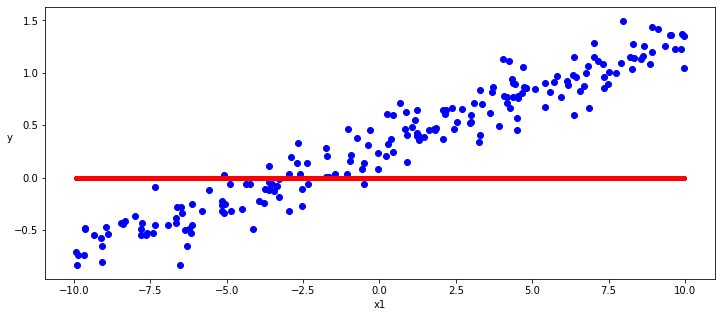

In [6]:
m = tf.Variable(0.)
b = tf.Variable(0.)
x, y = generate_data()
plt.figure(figsize = (12,5))
ax = plt.subplot(111)
ax.scatter(x,y, c = "b", label="samples")
ax.plot(x,m*x+b,"-r",linewidth = 5.0,label = "model")
plt.xlabel("x1")
plt.ylabel("y",rotation = 0)

# TensorFlow Model

In [7]:
class LinearRegressionKeras:
    def __init__(self):
        self.params = {
            "w" : tf.Variable(0.),
            "b" : tf.Variable(0.)
        }        

    def __call__(self,x): 
        y_pred = self.params["w"] * x + self.params["b"]
        return y_pred

# PyTorch Model

In [8]:
# class LinearRegressionPyTorch(torch.nn.Module): 
#     def __init__(self): 
#         super(LinearRegressionPyTorch, self).__init__() 
#         self.w = torch.tensor([0.0])
#         self.b = torch.tensor([0.0])
  
#     def forward(self, x):  
#         return x @ self.w + self.b
    
    
class LinearRegressionPyTorch(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionPyTorch, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  

    def forward(self, x):
        out = self.linear(x)
        return out

# TensorFlow Training

In [9]:
epochs = 500
learning_rate = 0.001

def squared_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

model = LinearRegressionKeras()

for epoch in tf.range(1,epochs):
    with tf.GradientTape() as tape:
        predictions = model(x)
        loss = squared_error(predictions, y)
    dloss_dw,dloss_db = tape.gradient(loss, [model.params["w"], model.params["b"]])
    # adjusting 
    model.params["w"].assign(model.params["w"] - learning_rate*dloss_dw)
    model.params["b"].assign(model.params["b"] - learning_rate*dloss_db)
    if epoch % 20 == 0:
        print(f"Step {epoch}, Loss {loss.numpy()}") # we print the loss only each 20 epochs

Step 20, Loss 0.1360427737236023
Step 40, Loss 0.10193243622779846
Step 60, Loss 0.09404604136943817
Step 80, Loss 0.08845134824514389
Step 100, Loss 0.08340545743703842
Step 120, Loss 0.07875426113605499
Step 140, Loss 0.07445959001779556
Step 160, Loss 0.07049355655908585
Step 180, Loss 0.06683100014925003
Step 200, Loss 0.06344868242740631
Step 220, Loss 0.06032515689730644
Step 240, Loss 0.057440634816884995
Step 260, Loss 0.05477682128548622
Step 280, Loss 0.0523168183863163
Step 300, Loss 0.050045061856508255
Step 320, Loss 0.04794713109731674
Step 340, Loss 0.04600971192121506
Step 360, Loss 0.04422054439783096
Step 380, Loss 0.042568277567625046
Step 400, Loss 0.041042428463697433
Step 420, Loss 0.03963332995772362
Step 440, Loss 0.038332048803567886
Step 460, Loss 0.037130337208509445
Step 480, Loss 0.036020584404468536


# PyTorch Training

In [10]:
x, y = generate_data()
x = torch.tensor(x.numpy())
y = torch.tensor(y.numpy())
x = x.reshape(-1, 1)
x.shape

torch.Size([200, 1])

In [ ]:
epochs = 500
learning_rate = 0.001

def squared_error(y_pred, y_true):
    diff = y_pred - y_true
    return torch.sum(diff * diff) / diff.numel()


model = LinearRegressionPyTorch()

[w, b] = model.parameters()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.01)

for epoch in range(epochs):
    epoch_loss = 0
    y_pred = model(torch.autograd.Variable(x))

    loss = squared_error(y_pred, Variable(torch.Tensor(y)))

    epoch_loss = loss.data[0]

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print("Epoch {} : Loss {}".format(epoch, epoch_loss))


# Data Visualization

In [ ]:
x_train, y_train = generate_data()
plt.figure(figsize = (12,5))
ax = plt.subplot(111)
ax.scatter(x_train,y_train, c = "b", label="samples")
ax.plot(x,model.params["w"]*x+model.params["b"],"-r",linewidth = 5.0,label = "model")
ax.legend()
plt.xlabel("x1")
plt.ylabel("y",rotation = 0)

In [ ]:
w, b